In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data_enefit_kggl/train.csv')

df_w = pd.read_csv('../data_enefit_kggl/historical_weather.csv')

df_wf = pd.read_csv('../data_enefit_kggl/forecast_weather.csv')

In [4]:
print(df.shape)
print(df.columns)
display(df.head(2))
display(df.tail(2))

# ~2M rows, 9 features here, target is y . . . 

(2018352, 9)
Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
2018350,15,1,3,0.00,0,2023-05-31 23:00:00,637,2018350,60
2018351,15,1,3,196.24,1,2023-05-31 23:00:00,637,2018351,60


target - The **consumption or production amount for the relevant segment** for the hour. The **segments are defined by** the 
* county, 
* is_business, and 
* product_type.

In [5]:
print('is_consumption')
display(df['is_consumption'].value_counts())

is_consumption


0    1009176
1    1009176
Name: is_consumption, dtype: int64

In [6]:
print('county')
print(' ')
display(df['county'].value_counts())
print('is_business')
print(' ')
display(df['is_business'].value_counts())
print('product_type')
print(' ')
display(df['product_type'].value_counts())

county
 


0     212928
11    198000
7     173088
5     151632
15    148752
4     147264
10    134640
14    125808
3     122496
9     122496
13    121056
2     115200
1      91872
8      91872
6      30624
12     30624
Name: county, dtype: int64

is_business
 


1    1083504
0     934848
Name: is_business, dtype: int64

product_type
 


3    918720
1    781632
0    170544
2    147456
Name: product_type, dtype: int64

In [7]:
# https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers/data

train.csv

county - An ID code for the county.

is_business - Boolean for whether or not the prosumer is a business.

product_type - ID code with the following mapping of codes to contract types: {0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}.

target - The consumption or production amount for the relevant segment for the hour. The segments are defined by the county, is_business, and product_type.

is_consumption - Boolean for whether or not this row's target is consumption or production.

datetime - The Estonian time in EET (UTC+2) / EEST (UTC+3).

data_block_id - All rows sharing the same data_block_id will be available at the same forecast time. 
This is a function of what information is available when forecasts are actually made, at 11 AM each morning. For example, if the forecast weather data_block_id for predictins made on October 31st is 100 then the historic weather data_block_id for October 31st will be 101 as the historic weather data is only actually available the next day.

row_id - A unique identifier for the row.

prediction_unit_id - A unique identifier for the county, is_business, and product_type combination. New prediction units can appear or disappear in the test set.

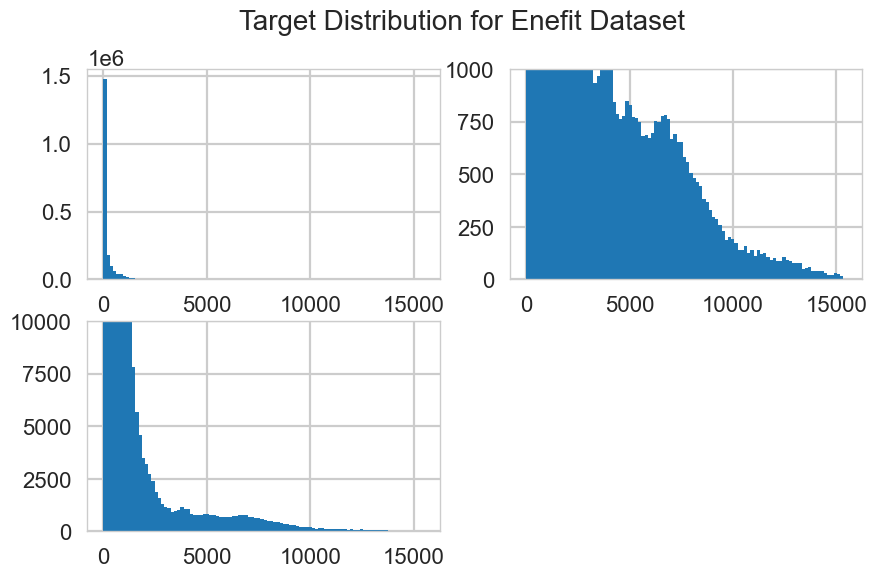

In [12]:
plt.figure(figsize=(10,6))

plt.suptitle('Target Distribution for Enefit Dataset', fontsize=20)

plt.subplot(2,2,1)
plt.style.use('default')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')
plt.hist(df['target'], bins=100);

plt.subplot(2,2,2)
plt.style.use('default')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')
plt.hist(df['target'], bins=100);
plt.ylim(0,1000)

plt.subplot(2,2,3)
plt.style.use('default')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')
plt.hist(df['target'], bins=100);
plt.ylim(0,10000);

target - The consumption or production amount for the relevant segment for the hour. The segments are defined by the county, is_business, and product_type.

note: hisogram by the segment definitions . . . and/or . . . look for differences in the segments . . 

note: certainly, as classification data, certainly huge imbalance here . . . heavy on low values !
      can play with classification . . . and the straight techniques . . . and also, different models
      trained by classified segments, predict within or something . . . much cool . . . ok. let's           head . . . (note: can dip in on nfl too if want to . . . but this be good one to get deep with)

In [13]:
print(df.columns)
df.head(3)

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1


In [14]:
print(df.shape, df_w.shape, df_wf.shape)

(2018352, 9) (1710800, 18) (3424512, 18)


In [15]:
print(df_w.columns)
print(" ")
print(df_wf.columns)
df_w.head(3)

Index(['datetime', 'temperature', 'dewpoint', 'rain', 'snowfall',
       'surface_pressure', 'cloudcover_total', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation', 'latitude', 'longitude', 'data_block_id'],
      dtype='object')
 
Index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'data_block_id', 'forecast_datetime',
       'direct_solar_radiation', 'surface_solar_radiation_downwards',
       'snowfall', 'total_precipitation'],
      dtype='object')


,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1
1,2021-09-01 00:00:00,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,57.6,22.2,1
2,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1


In [16]:
df.head(2)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0


In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])
df_w['datetime'] = pd.to_datetime(df_w['datetime'])
df_wf['forecast_datetime'] = pd.to_datetime(df_wf['forecast_datetime'])

In [18]:
print(np.min(df['datetime']), np.max(df['datetime']))

print(np.min(df_w['datetime']), np.max(df_w['datetime']))

print(np.min(df_wf['forecast_datetime']), np.max(df_wf['forecast_datetime']))

2021-09-01 00:00:00 2023-05-31 23:00:00
2021-09-01 00:00:00 2023-05-30 10:00:00
2021-09-01 01:00:00+00:00 2023-06-01 00:00:00+00:00


In [19]:
df.head(2)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0
